In [7]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [15]:
data = pd.read_excel('../../Data/Predictions/Logistic Regression/Logistic_Regression_Classifier_Predictions_All_Data.xlsx')
print(data)

          Class                           harmonized_filename  \
0         Sedan        Sedan_test_orig_test_00697_resized.jpg   
1         Sedan        Sedan_test_orig_test_04302_resized.jpg   
2        Pickup       Pickup_test_orig_test_07661_resized.jpg   
3           SUV          SUV_test_orig_test_02156_resized.jpg   
4         Sedan        Sedan_test_orig_test_01820_resized.jpg   
5   Convertible  Convertible_test_orig_test_06347_resized.jpg   
6        Pickup       Pickup_test_orig_test_00858_resized.jpg   
7           SUV          SUV_test_orig_test_03452_resized.jpg   
8        Pickup      Pickup_test_orig_train_02871_resized.jpg   
9         Sedan        Sedan_test_orig_test_06356_resized.jpg   
10          SUV          SUV_test_orig_test_01769_resized.jpg   
11          SUV         SUV_test_orig_train_03247_resized.jpg   
12       Pickup       Pickup_test_orig_test_04440_resized.jpg   
13       Pickup         SUV_test_orig_train_04481_resized.jpg   
14        Sedan       Sed

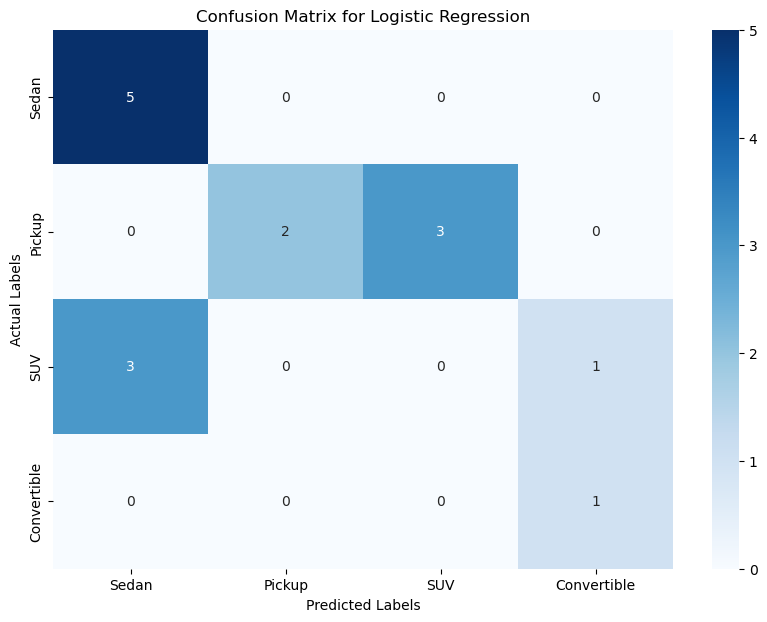

In [17]:
actual_labels = data['Class']
predicted_column = f'Logistic_Regression_Classification'
predicted_labels = data[predicted_column]

cm = confusion_matrix(actual_labels, predicted_labels, labels=actual_labels.unique())

#Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=actual_labels.unique(), yticklabels=actual_labels.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.show()

## Generic Function to viz Confusion Matrix

In [21]:
base_path = '../../Data/Predictions/'

In [22]:
classifier_name = 'Logistic Regression'

In [23]:
def visualize_classifier_confusion_matrix(base_path, classifier_name):
    classifier_dir = os.path.join(base_path, classifier_name)
    
    file_pattern = os.path.join(classifier_dir, f'{classifier_name.replace(" ", "_")}*.xlsx')
    files = glob.glob(file_pattern)

    if not files:
        print(f"No Excel files found for classifier '{classifier_name}' in '{classifier_dir}'.")
        return
    
    file_path = files[0]

    data = pd.read_excel(file_path)

    actual_labels = data['Class']
    predicted_column = [col for col in data.columns if 'Classification' in col][0] 
    predicted_labels = data[predicted_column]

    # Compute the confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels, labels=actual_labels.unique())

    # Visualize the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=actual_labels.unique(), yticklabels=actual_labels.unique())
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.show()



In [ ]:
# visualize_classifier_confusion_matrix('path/to/Predictions', 'Logistic Regression')
# visualize_classifier_confusion_matrix('path/to/Predictions', 'XGBoost')

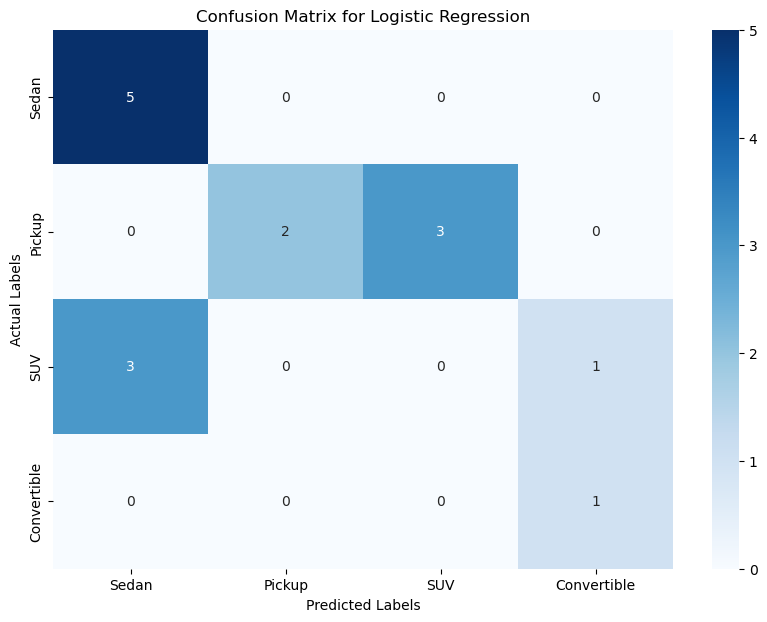

In [24]:
visualize_classifier_confusion_matrix(base_path, classifier_name)